In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.datasets.mnist import load_data

## Code alongs - MLP - Multilayered perceptron

In [5]:
# from tensorflows documentation 
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [6]:
x_train.shape

(60000, 28, 28)

7

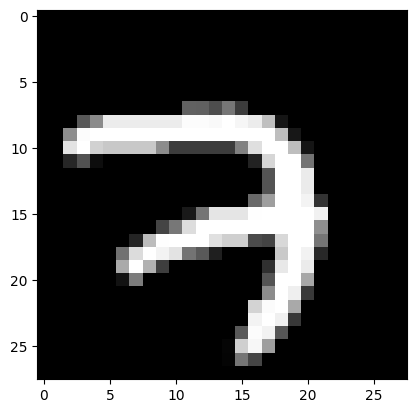

In [12]:
plt.imshow(x_train[5000], cmap="gray")
y_train[5000]

In [8]:
# 2D image for index 5000 - it contains 28x28 
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
x_train[5000].shape

(28, 28)

In [10]:
# pixel intensity between 0 and 254 for this image
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [11]:
# pixel value at row 10, col 5 for image 5000
x_train[5000,10,5]

199

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

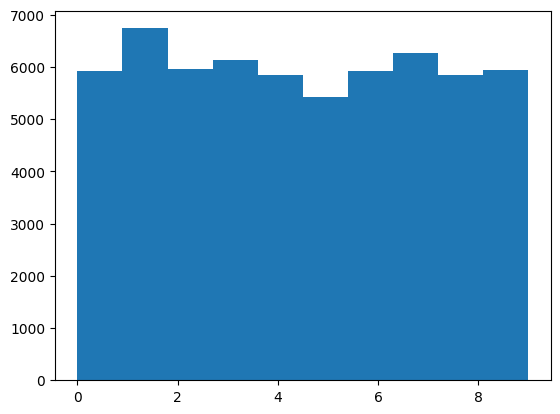

In [16]:
plt.hist(y_train)

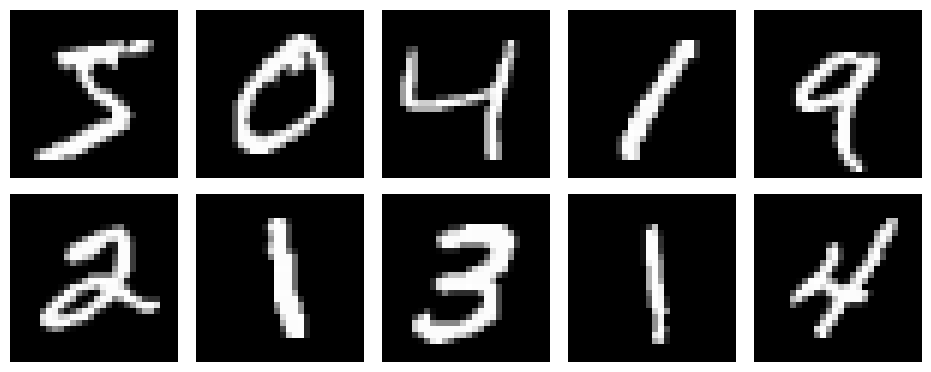

In [18]:
def display_images(data, n_rows = 2, n_cols = 5, figsize = (12, 4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)


display_images(x_train)

(10, 28, 28)

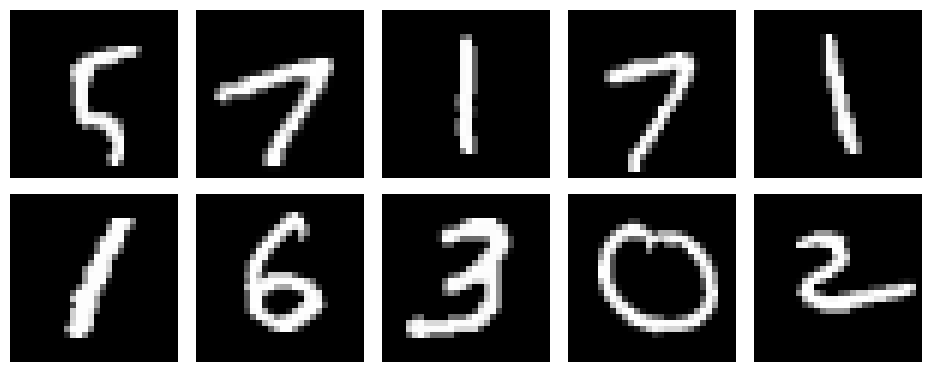

In [19]:
display_images(x_train[100:110])
x_train[100:110].shape

## Normalize data

In [21]:
X_train= x_train.astype("float32")/ 255
X_test= x_test.astype("float32")/ 255

In [22]:
X_train.min(), X_train.max()

(0.0, 1.0)

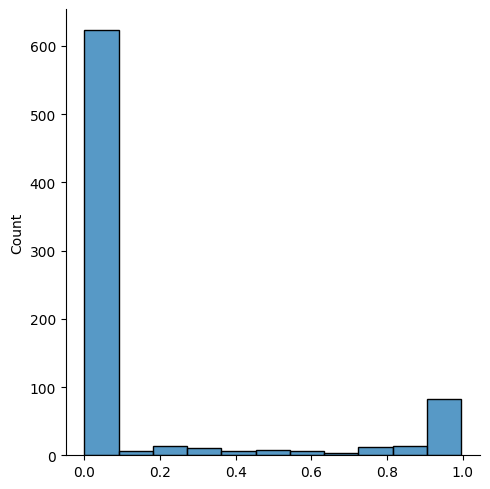

In [24]:
import seaborn as sns

sns.displot(data= X_train[5000].reshape(-1), kind= "hist")

## MLP model

- 10 output neurons/nodes wich represents 0, 1, 2, 3...., 9
- softmax activation function in output layer -> probabilities
- 784 neurons for input layer (28x28) -> use flatten layer
- hidden layers -> Dense

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def mlp_model(neurons= None, names= None, activations= []):
    model= Sequential(name= "MLP_model")
    model.add(Flatten(input_shape= (28, 28), name= "Input_layer"))
    
    # creates our hidden layers + output
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name= name, activation= activation))

    model.compile(loss= "sparse_categorical_crossentropy", optimizer= "adam", metrics= ["accuracy"])
    
    return model



model_naive= mlp_model(neurons= {10}, names= {"Output_layer"}, activations= {"softmax"})
model_naive.summary()

c:\Users\milto\Documents\skola\Artificial_Intelligence2-Milton-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model_naive.fit(X_train, y_train, validation_split= 1/6, epochs= 20, verbose= 1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8095 - loss: 0.7648 - val_accuracy: 0.9143 - val_loss: 0.3085
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9105 - loss: 0.3240 - val_accuracy: 0.9221 - val_loss: 0.2799
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9173 - loss: 0.2919 - val_accuracy: 0.9268 - val_loss: 0.2664
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9216 - loss: 0.2761 - val_accuracy: 0.9285 - val_loss: 0.2626
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9210 - loss: 0.2729 - val_accuracy: 0.9269 - val_loss: 0.2604
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9267 - loss: 0.2563 - val_accuracy: 0.9281 - val_loss: 0.2569
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9260 - loss: 0.2681 - val_accuracy: 0.9310 - val_loss: 0.2534
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9261 - loss: 0.2601 - 

In [43]:
import pandas as pd 

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.87254,0.499985,0.9143,0.308473
1,0.91128,0.316745,0.9221,0.279937
2,0.91764,0.292496,0.9268,0.266428
3,0.92062,0.281404,0.9285,0.262556
4,0.92250,0.274142,0.9269,0.260443


In [47]:
def plot_metrics(df_history):
    _, axes= plt.subplots(1, 2, figsize= (12, 4))
    metrics= [("loss", "val_loss"), ("accuracy",  "val_accuracy")]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y= metric, ylabel= metric[0], title= metric[0], ax= ax)
        
        
    plot_metrics(naive_history)

## Add hidden layers

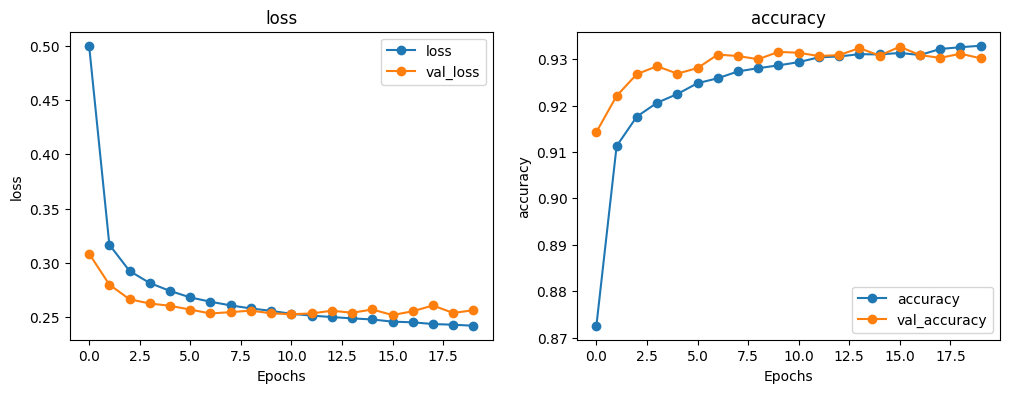

In [48]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(
            y=metric,
            xlabel="Epochs",
            ylabel=metric[0],
            title=metric[0],
            ax=ax,
            style=style,
        )


plot_metrics(naive_history)

In [49]:
model_deep = mlp_model(
    neurons=[128, 128, 10],
    activations=["relu", "relu", "softmax"],
    names=["Hidden_1", "Hidden_2", "Output"],
)

model_deep.summary()

c:\Users\milto\Documents\skola\Artificial_Intelligence2-Milton-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_deep.fit(X_train, y_train, validation_split=1 / 6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8672 - loss: 0.4470 - val_accuracy: 0.9620 - val_loss: 0.1309
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9656 - loss: 0.1092 - val_accuracy: 0.9731 - val_loss: 0.0905
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9775 - loss: 0.0703 - val_accuracy: 0.9748 - val_loss: 0.0897
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9826 - loss: 0.0525 - val_accuracy: 0.9747 - val_loss: 0.0885
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9878 - loss: 0.0360 - val_accuracy: 0.9786 - val_loss: 0.0771
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9903 - loss: 0.0295 - val_accuracy: 0.9760 - val_loss: 0.0940
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9914 - loss: 0.0256 - val_accuracy: 0.9763 - val_loss: 0.1015
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9926 - loss: 0.0212 - 

In [51]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92472,0.253120,0.9620,0.130915
1,0.96776,0.105825,0.9731,0.090496
2,0.97734,0.071083,0.9748,0.089700
3,0.98220,0.054960,0.9747,0.088541
4,0.98598,0.042472,0.9786,0.077101


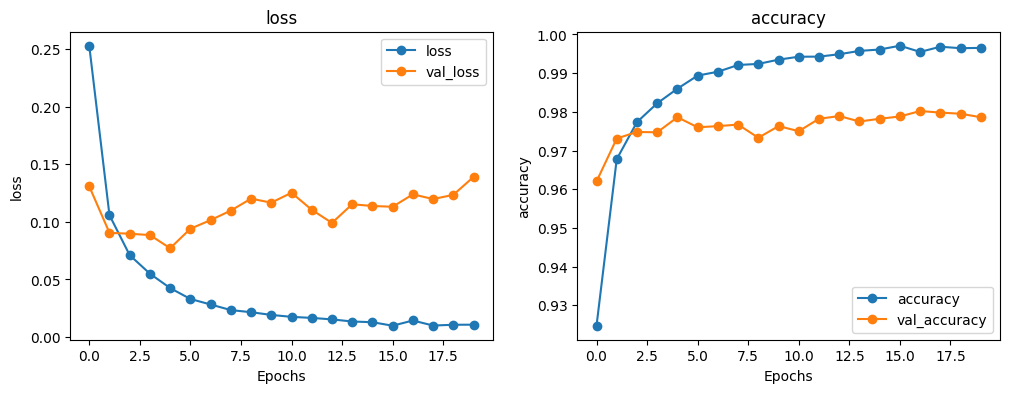

In [52]:
plot_metrics(deep_history)

In [53]:
# trains on all training data (60000)
model_deep.fit(X_train, y_train, epochs = 3, verbose=1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9925 - loss: 0.0315
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9967 - loss: 0.0108
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9966 - loss: 0.0121


## Prediction and evaluation

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_deep.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[9.37200214e-14, 2.83935098e-11, 2.47528198e-09, ...,
        1.00000000e+00, 2.71929657e-09, 2.00406749e-08],
       [2.50587157e-22, 6.41164978e-14, 1.00000000e+00, ...,
        2.90071561e-21, 6.31790176e-16, 1.86871647e-30],
       [1.27004665e-19, 1.00000000e+00, 1.05719924e-13, ...,
        9.73414925e-12, 3.55715526e-11, 5.77758262e-17],
       ...,
       [1.55334921e-25, 8.48402077e-21, 5.42062566e-25, ...,
        5.97188880e-16, 1.41837053e-18, 3.13712842e-13],
       [4.00944487e-23, 1.96071754e-28, 2.08503763e-23, ...,
        5.42499004e-25, 4.93200112e-08, 2.16862765e-21],
       [5.74116983e-20, 4.71043040e-20, 1.37349588e-24, ...,
        9.26370305e-32, 3.82922446e-16, 7.39510691e-26]], dtype=float32)

In [55]:
y_pred[1]

array([2.5058716e-22, 6.4116498e-14, 1.0000000e+00, 1.2863107e-14,
       2.2997044e-27, 5.1457744e-23, 3.8380844e-25, 2.9007156e-21,
       6.3179018e-16, 1.8687165e-30], dtype=float32)

In [56]:
y_test[1]

2

In [57]:
y_pred.shape

(10000, 10)

In [58]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



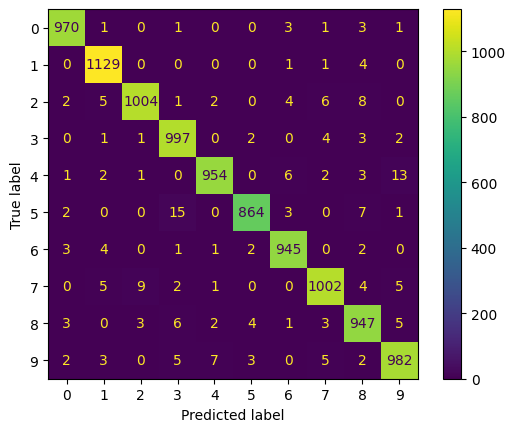

In [60]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Some misclassifications

In [61]:
(y_pred != y_test).sum()

206

In [62]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_indices[:10]

array([ 43, 104, 115, 149, 247, 321, 340, 445, 456, 495], dtype=int64)

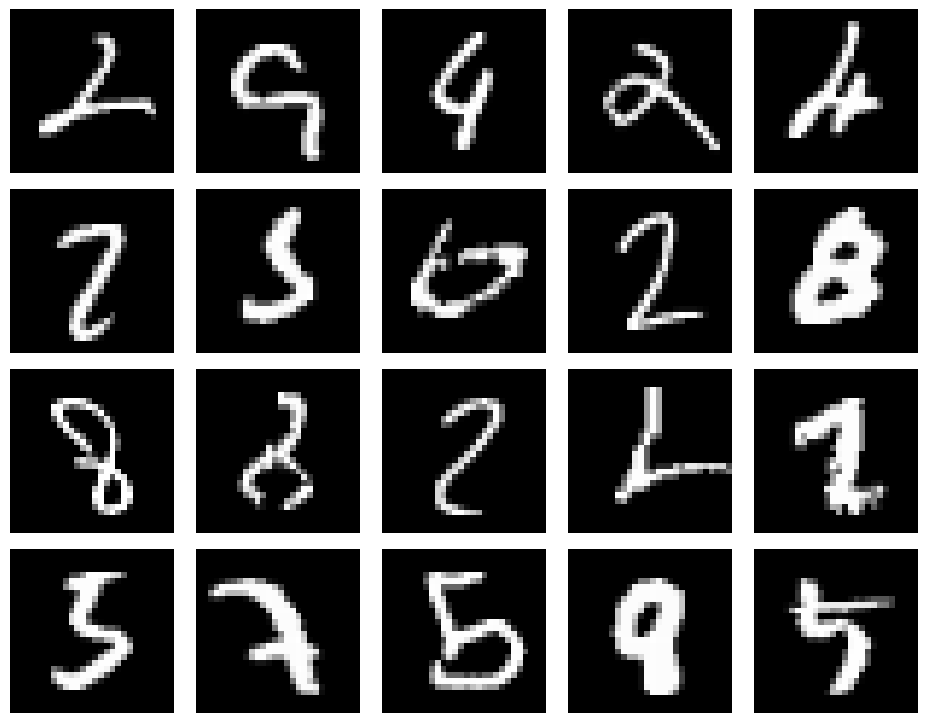

In [63]:
display_images(X_test[misclassified_indices], 4, 5, (12, 8))